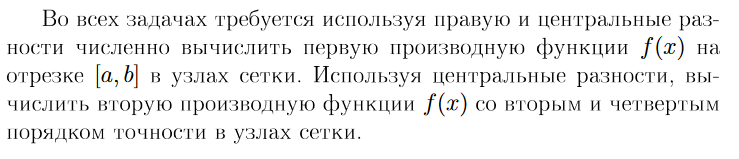

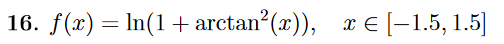

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# Просто нужные импорты

def f(x):
    return np.log(1 + np.arctan(x) ** 2)
# Сама наша функция

def df(x):
    return 2 * np.arctan(x) / ((1 + x ** 2) * (1 + np.arctan(x) ** 2))
# Производная нашей функции

def ddf(x):
    arctan_x = np.arctan(x)
    arctan_x_squared = arctan_x**2
    x_squared = x**2
    denom = (1 + arctan_x_squared)*(1 + x_squared)
    num1 = (2 / (1 + x_squared)) * denom - (2 * arctan_x) * ((1 + arctan_x_squared)*(2 * x) + \
    (1 + x_squared)*(2 * arctan_x / (1 + x_squared)))
    denom2 = denom**2
    f_double_prime = num1 / denom2
    return f_double_prime
# Вторая производная нашей функции

a, b = -1.5, 1.5
# Наш отрезок

N = 100
# Кол-во узлов 

### Занимательная вторая производная
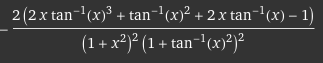

In [18]:
def right_difference(y, h):
    df_forward = np.zeros_like(y)
    df_forward[:-1] = (y[1:] - y[:-1]) / h
    df_forward[-1] = (y[-1] - y[-2]) / h
    return df_forward

# Правая разность появляется из разложения в ряд Тейлора:
# y(x+h) = y(x) + h*y'(x) + h^2/2*y''(x) + O(h^3) | -y(x)
# y(x+h) - y(x) = h*y'(x) + h^2/2*y''(x) + O(h^3) | / h
# (y(x+h) - y(x)) / h = y'(x) + h/2*y''(x) + O(h^2) 
# Отсюда можно сказать, что ошибка должна быть порядка h/2*y''(x) + O(h^2) т.е. порядка h
def central_difference(y, h):
    df_central = np.zeros_like(y)
    df_central[1:-1] = (y[2:] - y[:-2]) / (2 * h)
    df_central[0] = (y[1] - y[0]) / h
    df_central[-1] = (y[-1] - y[-2]) / h
    return df_central

# Аналогично, центральная разность появляется из разности рядов тейлора:
# y(x+h) = y(x) + h*y'(x) + h^2/2*y''(x) + O(h^3)
# y(x-h) = y(x) - h*y'(x) + h^2/2*y''(x) - O(h^3) | вычтим второе из первого
# y(x+h) - y(x-h) = 2*h*y'(x) + O(h^3) | / 2*h
# (y(x+h) - y(x-h)) / (2*h) = y'(x) + O(h^4)
# Отсюда можно сказать, что ошибка должна быть порядка h^2/6*y'''(x) + O(h^4) т.е. порядка h^2

### Более красиво и только вывод
Первая производная функции f(x) вычисляется с помощью:
- Правая разность:
$$ f'(x) = \frac{f(x+h) - f(x)}{h} $$
- Центральная разность:
$$ f'(x) = \frac{f(x+h) - f(x-h)}{2h} $$

In [19]:
x = np.linspace(a, b, N)
h = x[1] - x[0]
y = f(x)

In [20]:
df_right = right_difference(y, h)
df_central = central_difference(y, h)
df_exact = df(x)

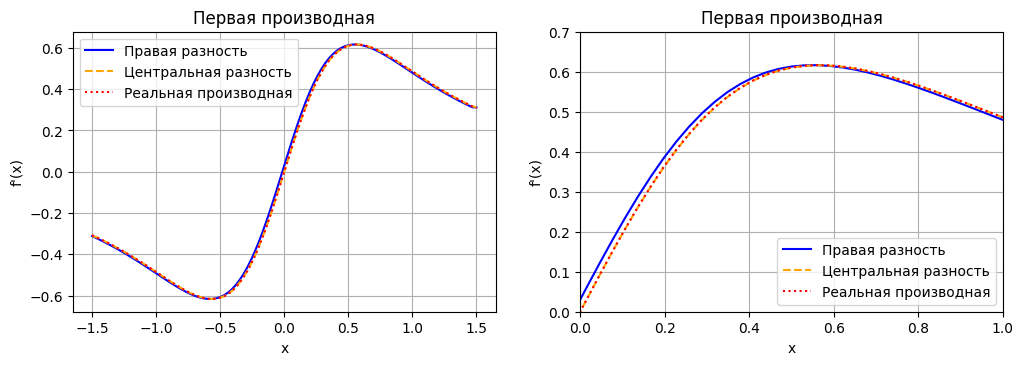

h = 0.030303030303030276
Худшая ошибка в правой разности: 0.03028680542992461
Худшая ошибка в центральной разности: 0.004323496219282574


In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, df_right, label='Правая разность', color='blue')
plt.title("Первая производная")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 1)
plt.plot(x, df_central, '--', label='Центральная разность', color='orange')
plt.title("Первая производная")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 1)
plt.plot(x, df_exact, ':', label='Реальная производная', color='red')
plt.title("Первая производная")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(x, df_right, label='Правая разность', color='blue')
plt.title("Первая производная")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(x, df_central, '--', label='Центральная разность', color='orange')
plt.title("Первая производная")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(x, df_exact, ':', label='Реальная производная', color='red')
plt.title("Первая производная")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 0.7])

plt.show()
error_forward = np.abs(df_right - df_exact)
error_central = np.abs(df_central - df_exact)

print(f"h = {h}")
print("Худшая ошибка в правой разности:", max(error_forward))
print("Худшая ошибка в центральной разности:", max(error_central))

In [22]:
def ddf_2nd_order(y, h):
    d2f = np.zeros_like(y)
    d2f[1:-1] = (y[2:] - 2*y[1:-1] + y[:-2]) / h**2
    d2f[0] = (2*y[0] - 5*y[1] + 4*y[2] - y[3]) / h**2
    d2f[-1] = (2*y[-1] - 5*y[-2] + 4*y[-3] - y[-4]) / h**2
    return d2f
# Аналогично первой производной мы получаем через Тейлора вторую с вторым порядком малости:
# f(x+h) = f(x) + h*f'(x) + h^2/2*f''(x) + h^3/6*f'''(x) + h^4/24*f''''(x) + ...
# f(x-h) = f(x) - h*f'(x) + h^2/2*f''(x) - h^3/6*f'''(x) + h^4/24*f''''(x) + ... | Сложим уравнения
# f(x+h) + f(x-h) = 2*f(x) + h^2*f''(x) + h^4/24*f''''(x) + ... | - 2f(x)
# f(x+h) - 2*f(x) + f(x-h) = h^2*f''(x) + h^4/24*f''''(x) + ... | / h^2
# (f(x+h) - 2*f(x) + f(x-h)) / h^2 = f''(x) + h^2/24*f''''(x) + ...
# Отсюда можно сказать, что ошибка должна быть порядка h^2/24*y''''(x) + O(h^4) т.е. порядка h^2

def ddf_4th_order(y, h):
    d2f = np.zeros_like(y)
    d2f[2:-2] = (-y[4:] + 16*y[3:-1] - 30*y[2:-2] + 16*y[1:-3] - y[0:-4]) / (12 * h**2)
    d2f[0] = (45*y[0] - 154*y[1] + 214*y[2] - 156*y[3] + 61*y[4] - 10*y[5]) / (12 * h**2)
    d2f[1] = (10*y[0] - 15*y[1] - 4*y[2] + 14*y[3] - 6*y[4] + y[5]) / (12 * h**2)
    d2f[-2] = (10*y[-1] - 15*y[-2] - 4*y[-3] + 14*y[-4] - 6*y[-5] + y[-6]) / (12 * h**2)
    d2f[-1] = (45*y[-1] - 154*y[-2] + 214*y[-3] - 156*y[-4] + 61*y[-5] - 10*y[-6]) / (12 * h**2)
    return d2f

    
# Очень много писанины, но принцип тот же

In [23]:
d2f_2nd_order = ddf_2nd_order(y, h)
d2f_4th_order = ddf_4th_order(y, h)
d2f_exact = ddf(x)

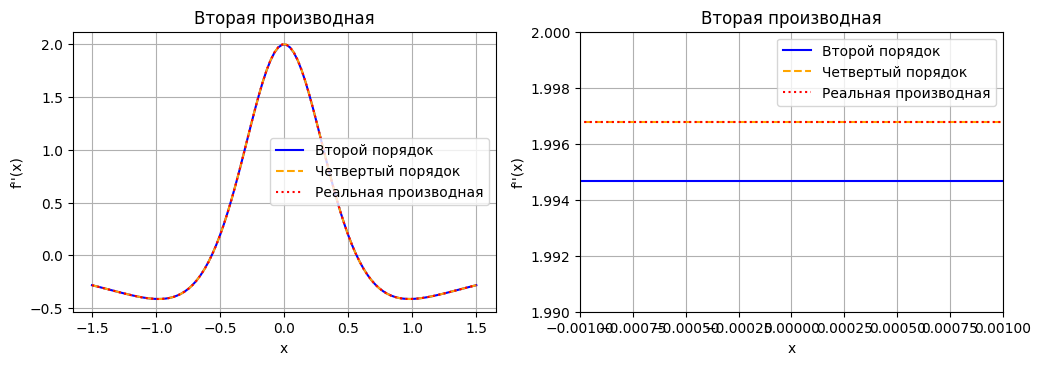

h = 0.030303030303030276
Худшая ошибка в правой разности: 0.0021305730539196155
Худшая ошибка в центральной разности: 1.0041368522450966e-05


In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, d2f_2nd_order, label='Второй порядок', color='blue')
plt.title("Вторая производная")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 1)
plt.plot(x, d2f_4th_order, '--', label='Четвертый порядок', color='orange')
plt.title("Вторая производная")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 1)
plt.plot(x, d2f_exact, ':', label='Реальная производная', color='red')
plt.title("Вторая производная")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(x, d2f_2nd_order, label='Второй порядок', color='blue')
plt.title("Вторая производная")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(x, d2f_4th_order, '--', label='Четвертый порядок', color='orange')
plt.title("Вторая производная")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(x, d2f_exact, ':', label='Реальная производная', color='red')
plt.title("Вторая производная")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)
plt.xlim([-0.001, 0.001])
plt.ylim([1.99, 2.00])

plt.show()

error_forward = np.abs(d2f_2nd_order - d2f_exact)
error_central = np.abs(d2f_4th_order - d2f_exact)

print(f"h = {h}")
print("Худшая ошибка в правой разности:", max(error_forward))
print("Худшая ошибка в центральной разности:", max(error_central))

исследовать зависимость ошибки от шага и построить график зависимости в лог масштабе (должна быть прямая)

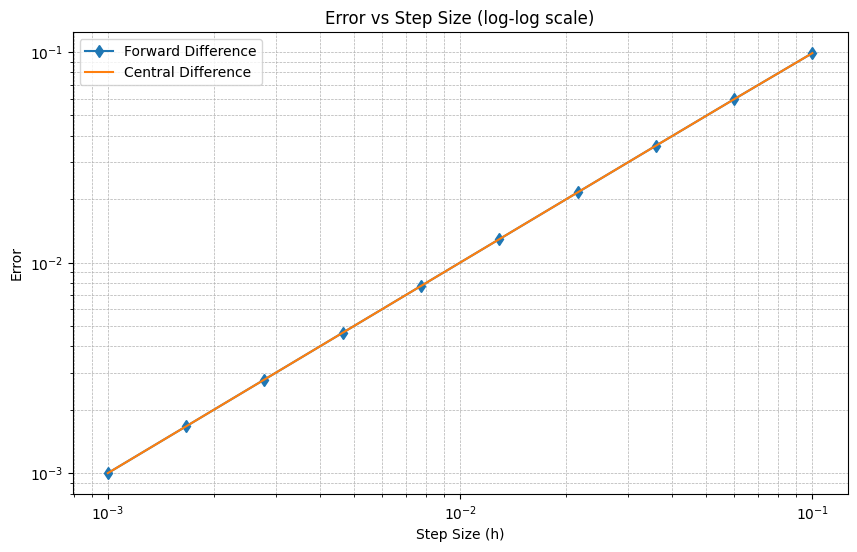

In [27]:
# f = lambda x: np.sin(x)  # Example function
#df_exact = lambda x: np.cos(x)  # Exact derivative

# Domain and step sizes
x_start, x_end = 0, np.pi  # Define the interval
step_sizes = np.logspace(-3, -1, 10)  # Step sizes from 0.001 to 0.1

# Prepare to store errors
errors_forward = []
errors_central = []

# Loop through step sizes
for h in step_sizes:
    x_vals = np.arange(x_start, x_end, h)
    if len(x_vals) < 3:
        continue  # Skip if not enough points for central difference
    y_vals = f(x_vals)
    
    # Forward difference
    forward_diff = right_difference(y_vals, h)
    error_forward = np.abs(forward_diff - df(x_vals)).max()
    errors_forward.append(error_forward)
    
    # Central difference
    central_diff = central_difference(y_vals, h)
    error_central = np.abs(central_diff - df(x_vals)).max()
    errors_central.append(error_central)

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, errors_forward, label="Forward Difference", marker='d')
plt.loglog(step_sizes, errors_central, label="Central Difference", marker='')
plt.xlabel("Step Size (h)")
plt.ylabel("Error")
plt.title("Error vs Step Size (log-log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()
